# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

c:\Users\stijn\AppData\Local\Programs\Python\Python312\Lib\site-packages\mesa\time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Agent 0 has friends [49, 2, 4, 46, 39, 18, 12, 28, 14]
Agent 1 has friends [2, 3, 4, 48, 5, 47, 6, 46, 36]
Agent 2 has friends [1, 0, 4, 5, 49, 48, 7, 47, 46, 18, 45]
Agent 3 has friends [4, 1, 6, 7, 8, 48, 13, 39, 14, 40]
Agent 4 has friends [3, 5, 2, 1, 7, 0, 9, 49, 23, 21, 42]
Agent 5 has friends [4, 6, 2, 8, 1, 48, 39, 9, 40]
Agent 6 has friends [5, 3, 1, 11, 37, 20, 15, 39, 49, 13, 21]
Agent 7 has friends [8, 9, 4, 10, 3, 11, 2, 28, 23]
Agent 8 has friends [7, 9, 5, 11, 12, 3, 33, 48]
Agent 9 has friends [8, 10, 7, 11, 12, 4, 5, 18, 34, 24, 45]
Agent 10 has friends [9, 11, 7, 13, 14, 15, 22, 38, 44, 40]
Agent 11 has friends [10, 12, 9, 8, 14, 7, 15, 6, 16, 46, 32, 39, 30, 37, 44]
Agent 12 has friends [11, 14, 9, 8, 16, 46, 0, 39, 29, 30, 32, 31]
Agent 13 has friends [15, 10, 18, 33, 3, 28, 6]
Agent 14 has friends [15, 12, 16, 11, 17, 10, 3, 0, 33]
Agent 15 has friends [14, 16, 13, 18, 11, 19, 10, 20, 6, 34, 36]
Agent 16 has friends [15, 17, 14, 12, 11, 21, 46, 37, 49, 25, 26]
Agen

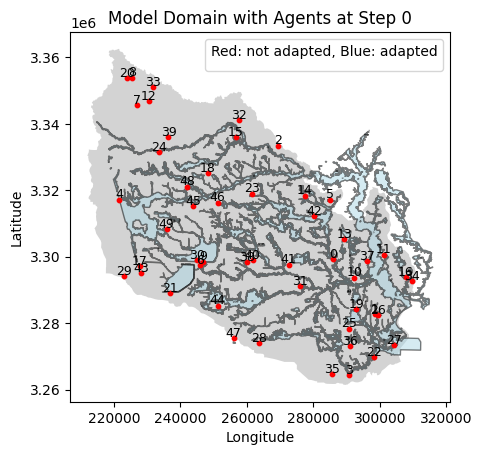

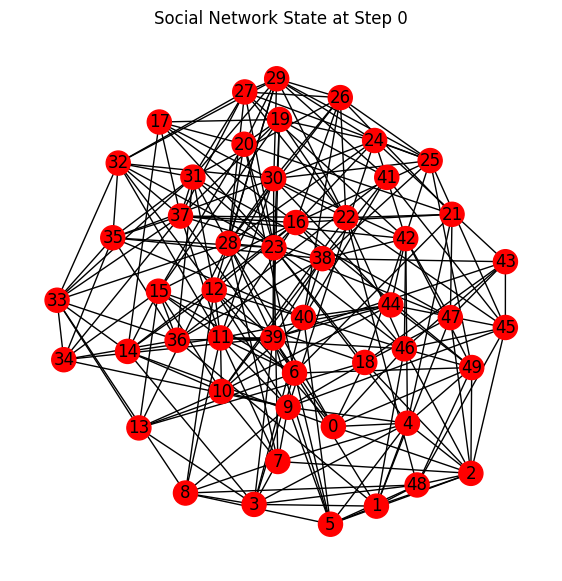


At step: 1 agent 0 has belief: 0.32310473316431443
Friend 49 has belief 0.8423554285232473
Friend 2 has belief 0.6657865602830305
Friend 4 has belief 0.41633584836378834
Friend 46 has belief 0.8481084157474199
Friend 39 has belief 0.5867880747967277
Friend 18 has belief 0.43204362258965057
Friend 12 has belief 0
Friend 28 has belief 0.4613748130046147
Friend 14 has belief 0.8337932064051796


The average belief difference at this step is 0.31387253750705085

At step: 1 agent 1 has belief: 0.6871529585507666
Friend 2 has belief 0.6657865602830305
Friend 3 has belief 0
Friend 4 has belief 0.41633584836378834
Friend 48 has belief 0.3413191191866413
Friend 5 has belief 0.4693232292799181
Friend 47 has belief 0.4864556566073964
Friend 6 has belief 0.822515188483401
Friend 46 has belief 0.8481084157474199
Friend 36 has belief 0.3591037154157054


The average belief difference at this step is 0.26311825198313044

At step: 1 agent 2 has belief: 0.49338356933606353
Friend 1 has belief 0.687152

<Figure size 1000x600 with 0 Axes>

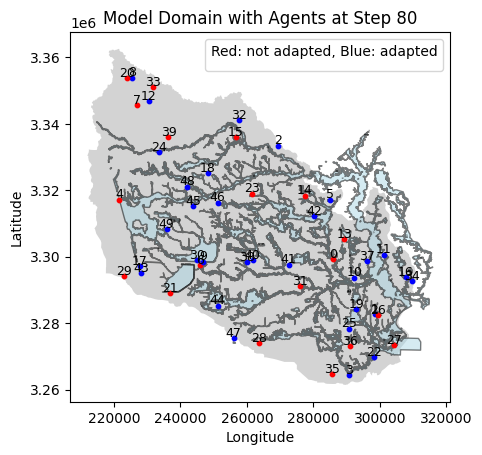

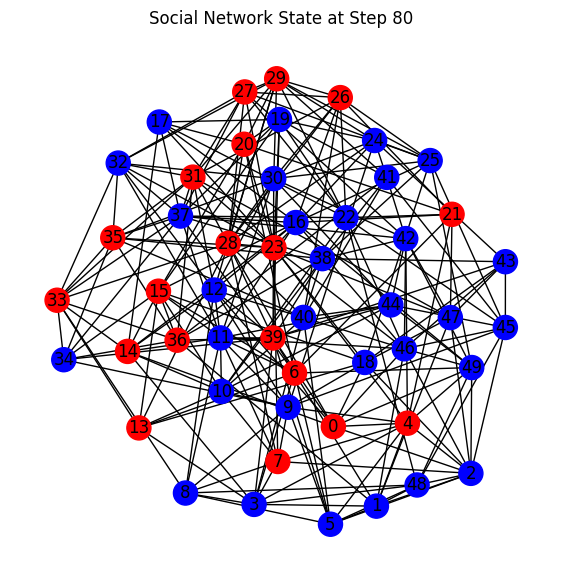

'params = {}\nresults = batch_run(\n    AdaptationModel,\n    parameters=params,\n    iterations=30,\n    max_steps=79, ## runt 80 stappen, geen idee \n    number_processes=1,\n    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step\n    display_progress=True,\n    )\n\nresults_df = pd.DataFrame(results)\nprint(f"Column names in the dataframe: {results_df.columns.tolist()}")\nresults_df.head()\n'

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from mesa import batch_run
import pandas as pd 
import seaborn as sns
import random
#from mesa.batchrunner import BatchRunner

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households = 50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(80):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 80 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()


params = {}
results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=30,
    max_steps=79, ## runt 80 stappen, geen idee 
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
    )

results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}")
results_df.head()


#STAAT OOK HELEMAAL BENEDEN

#unique_iterations = results_df['iteration'].unique()
#for iteration in unique_iterations:
#    iteration_data = results_df[results_df['iteration'] == iteration]
#    g = sns.scatterplot(data=iteration_data, x="Step", y="belief")
#    g.set(
#        xlabel="Step",
#        ylabel="Agent's belief",
#        title=f"Agents belief through time - Iteration {iteration} "
#    )
#    plt.show()

In [2]:
print(results_df)
#results_df.to_excel(r"C:\Users\stijn\Downloads\Data export test.xlsx", index=True, engine = 'openpyxl')  # Set index to True if you want to include the index


NameError: name 'results_df' is not defined

In [3]:
def calculate_adapted_percentage(results_df):
    # Get the maximum step for each iteration
    max_steps = results_df.groupby('iteration')['Step'].max().reset_index()
    
    # Merge to get only the rows corresponding to the last step of each iteration
    last_steps_df = pd.merge(results_df, max_steps, on=['iteration', 'Step'])
    
    # Calculate the percentage of adapted households for each iteration at the last step
    adapted_percentage = last_steps_df.groupby('iteration')['IsAdapted'].mean() * 100
    
    return adapted_percentage

adapted_percentages = calculate_adapted_percentage(results_df)
print(adapted_percentages)


NameError: name 'results_df' is not defined

Step
0      0.000000
1     39.000000
2     45.066667
3     47.733333
4     49.133333
5     49.333333
6     49.333333
7     49.333333
8     49.333333
9     49.333333
10    49.333333
11    49.333333
12    49.333333
13    49.333333
14    49.333333
15    49.333333
16    49.333333
17    49.333333
18    49.333333
19    49.333333
20    49.333333
21    49.333333
22    49.333333
23    49.333333
24    49.333333
25    49.333333
26    49.333333
27    49.333333
28    49.333333
29    49.333333
30    49.333333
31    49.333333
32    49.333333
33    49.333333
34    49.333333
35    49.333333
36    49.333333
37    49.333333
38    49.333333
39    49.333333
40    49.333333
41    49.333333
42    49.333333
43    49.333333
44    49.333333
45    49.333333
46    49.333333
47    49.333333
48    49.333333
49    49.333333
50    49.333333
51    49.333333
52    49.333333
53    49.333333
54    49.333333
55    49.333333
56    49.333333
57    49.333333
58    49.333333
59    49.333333
60    49.333333
61    49.333333
62 

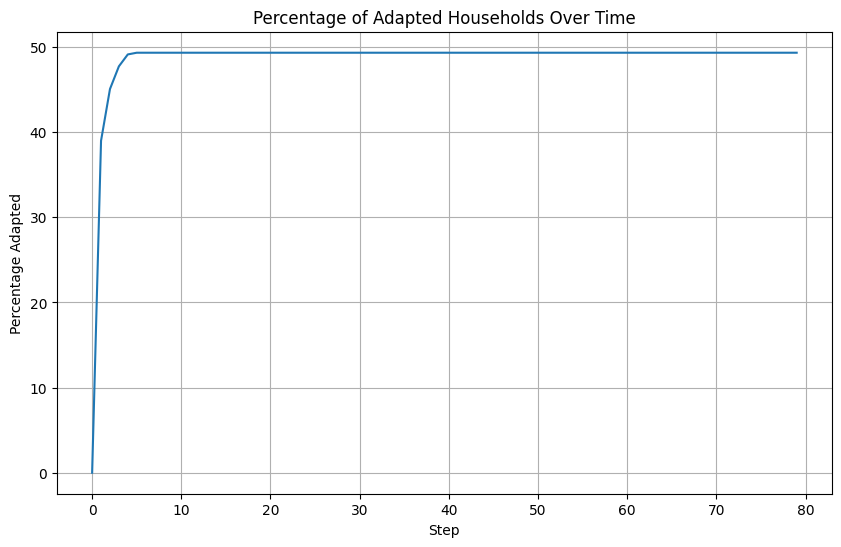

In [ ]:
def calculate_adapted_percentage_by_step(results_df):
    adapted_percentage_by_step = results_df.groupby('Step')['IsAdapted'].mean() * 100
    
    return adapted_percentage_by_step

adapted_percentages_by_step = calculate_adapted_percentage_by_step(results_df)
print(adapted_percentages_by_step)

def plot_adapted_percentages(series, title='Percentage of Adapted Households Over Time', xlabel='Step', ylabel='Percentage Adapted'):
    series.plot(kind='line', figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
plot_adapted_percentages(adapted_percentages_by_step)


In [ ]:
##STANDARD DEVIATION VAN MODEL RUN 


agent_data = model.datacollector.get_agent_vars_dataframe() 
print("Data at Step {}: {}".format(step, agent_data))
#print(agent_data.head())
agent_data
agent_data.to_excel(r"C:\Users\stijn\Downloads\Data export test.xlsx", index=True, engine = 'openpyxl')  # Set index to True if you want to include the index
#agent_data.to_csv('path_to_file.csv', index=True)  # Set index to True if you want to include the index

agent_data.reset_index(inplace=True)
first_step_data = agent_data.groupby('AgentID').first()
last_step_data = agent_data.groupby('AgentID').last()
first_step_beliefs = first_step_data['belief']
last_step_beliefs = last_step_data['belief']
belief_difference = last_step_beliefs - first_step_beliefs

average_belief_first_step = first_step_beliefs.mean()
print("Average belief at the start is:", average_belief_first_step)
# Calculate the standard deviation of belief at the first step
std_dev_belief_first_step = first_step_beliefs.std()
print(f"Standard deviation of belief at the first step: {std_dev_belief_first_step}")
average_belief_last_step = last_step_beliefs.mean()
print("Average belief at the end is:", average_belief_last_step)
# Calculate the standard deviation of belief at the last step
std_dev_belief_last_step = last_step_beliefs.std()
print(f"Standard deviation of belief at the last step: {std_dev_belief_last_step}")
print("")

print(belief_difference)

#g = sns.scatterplot(data=results_df, x="Step", y="belief")
#g.set(
    #xlabel="Step",
    #ylabel="Agent's belief",
    #title="Agents' belief through time"
#)



Data at Step 79:               FloodDamageEstimated  IsAdapted  FriendsCount    belief  \
Step AgentID                                                            
0    0                    0.609259      False            11  0.609259   
     1                    0.000000      False             7  0.000000   
     2                    0.000000      False            10  0.000000   
     3                    0.468161      False             8  0.468161   
     4                    0.465305      False            12  0.465305   
...                            ...        ...           ...       ...   
79   45                   0.000000      False            11  0.445242   
     46                   0.526545      False            11  0.445242   
     47                   0.900708       True             9  0.445242   
     48                   0.615870      False            10  0.445242   
     49                   0.537100      False            14  0.445242   

              Stubornness  
Step 

Average belief at the start is: 0.41742640540460996
Standard deviation of belief at the first step: 0.26031923582530475
Average belief at the end is: 0.44524183134565887
Standard deviation of belief at the last step: 9.90477223794274e-17

AgentID
0    -0.164017
1     0.445242
2     0.445242
3    -0.022919
4    -0.020063
5    -0.032691
6    -0.235491
7     0.445242
8     0.121240
9    -0.326079
10   -0.238534
11   -0.107903
12   -0.258001
13    0.445242
14   -0.037223
15    0.023696
16    0.445242
17   -0.011174
18    0.445242
19    0.445242
20   -0.097621
21    0.445242
22   -0.078061
23   -0.176818
24    0.086903
25   -0.254020
26   -0.191564
27   -0.125979
28    0.445242
29   -0.165015
30   -0.107099
31    0.121932
32   -0.109796
33   -0.127095
34   -0.105826
35    0.060141
36    0.445242
37    0.073812
38   -0.078283
39   -0.211285
40    0.033286
41    0.445242
42   -0.067373
43   -0.205028
44   -0.118928
45    0.445242
46   -0.081303
47   -0.455466
48   -0.170628
49   -0.091858
Nam

In [ ]:
#CORRELATIE TUSSEN TWEE AGENTS IN MODEL RUN 

household_1_data = agent_data[agent_data['AgentID'] == 0].reset_index(drop=True)
household_2_data = agent_data[agent_data['AgentID'] == 1].reset_index(drop=True)

household_1_belief = household_1_data['belief']
household_2_belief = household_2_data['belief']

# Drop NaN values if they exist
household_1_belief.dropna(inplace=True)
household_2_belief.dropna(inplace=True)

# Calculate the correlation if both series have more than one unique value
if household_1_belief.nunique() > 1 and household_2_belief.nunique() > 1:
    correlation = household_1_belief.corr(household_2_belief)
    print(f"Correlation coefficient between household a and b is: {correlation}")

else:
    print("Correlation cannot be calculated due to insufficient variation in the data.")


Correlation coefficient between household a and b is: -0.7573878604790476


In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

total_adapted_households
0                          0
1                          9
2                          9
3                          9
4                          9
5                          9
6                          9
7                          9
8                          9
9                          9
10                         9
11                         9
12                         9
13                         9
14                         9
15                         9
16                         9
17                         9
18                         9
19                         9
20                         9
21                         9
22                         9
23                         9
24                         9
25                         9
26                         9
27                         9
28                         9
29                         9
30                         9
31                         9
32                         9
33                         9
34                         9
35                         9
36                         9
37                         9
38                         9
39                         9
40                         9
41                         9
42                         9
43                         9
44                         9
45                         9
46                         9
47                         9
48                         9
49                         9
50                         9
51                         9
52                         9
53                         9
54                         9
55                         9
56                         9
57                         9
58                         9
59                         9
60                         9
61                         9
62                         9
63                         9
64                         9
65                         9
66                         9
67                         9
68                         9
69                         9
70                         9
71                         9
72                         9
73                         9
74                         9
75                         9
76                         9
77                         9
78                         9
79                         9

In [ ]:
'''household_positions = [(agent.location.x, agent.location.y) for agent in model.schedule.agents]
beliefs = [agent.belief for agent in model.schedule.agents]

# Create a scatter plot based on spatial positions
plt.scatter([pos[0] for pos in household_positions], [pos[1] for pos in household_positions], c=beliefs, cmap='viridis', marker='o')
plt.colorbar(label='Belief')
plt.title('Belief of Agents Based on Spatial Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
'''


"household_positions = [(agent.location.x, agent.location.y) for agent in model.schedule.agents]\nbeliefs = [agent.belief for agent in model.schedule.agents]\n\n# Create a scatter plot based on spatial positions\nplt.scatter([pos[0] for pos in household_positions], [pos[1] for pos in household_positions], c=beliefs, cmap='viridis', marker='o')\nplt.colorbar(label='Belief')\nplt.title('Belief of Agents Based on Spatial Positions')\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\n"

In [ ]:
#Gemiddelde belief over time van alle agents samen in alle iteraties

'''average_belief_per_step = results_df.groupby('Step')['belief'].mean().reset_index()
g = sns.lineplot(data=average_belief_per_step, x="Step", y="belief")
g.set(
    xlabel="Step",
    ylabel="Average belief",
    title=f"Average Agents'belief accross all iterations over time"
)
    
plt.show()
'''

'average_belief_per_step = results_df.groupby(\'Step\')[\'belief\'].mean().reset_index()\ng = sns.lineplot(data=average_belief_per_step, x="Step", y="belief")\ng.set(\n    xlabel="Step",\n    ylabel="Average belief",\n    title=f"Average Agents\'belief accross all iterations over time"\n)\n    \nplt.show()\n'

In [ ]:
#Overall average belief across all agents and iterations is
#Overall st Dev

# Group data by 'AgentID' and get all beliefs
beliefs_per_agent = results_df.groupby('AgentID')['belief']

# Calculate the mean belief for each agent across all iterations
average_belief_per_agent = beliefs_per_agent.mean()
#print("Average belief per agent across all iterations:", average_belief_per_agent)

# Calculate the standard deviation of belief for each agent across all iterations
std_dev_belief_per_agent = beliefs_per_agent.std()
#print("Standard deviation of belief per agent across all iterations:", std_dev_belief_per_agent)

# Now calculate the overall mean of the average beliefs and the overall standard deviation
overall_mean_belief = average_belief_per_agent.mean()
overall_std_dev_belief = std_dev_belief_per_agent.mean()  # This gives the average of the standard deviations

print(f"Overall average belief across all agents and iterations is: {overall_mean_belief}")
print(f"Overall standard deviation of belief across all agents and iterations is: {overall_std_dev_belief}")


Overall average belief across all agents and iterations is: 0.4487542679333808
Overall standard deviation of belief across all agents and iterations is: 0.08044358590771684


In [ ]:
# Group data by 'AgentID' and get the first and last beliefs for each agent
first_step_beliefs = results_df.groupby('AgentID')['belief'].nth(0)  # Beliefs at the first step
last_step_beliefs = results_df.groupby('AgentID')['belief'].nth(-1)  # Beliefs at the last step

# Calculate the standard deviation of beliefs at the first step across all agents
std_dev_belief_first_step = first_step_beliefs.std()
print(f"Standard deviation of belief at the first step across all agents and iterations: {std_dev_belief_first_step}")

# Calculate the standard deviation of beliefs at the last step across all agents
std_dev_belief_last_step = last_step_beliefs.std()
print(f"Standard deviation of belief at the last step across all agents and iterations: {std_dev_belief_last_step}")


Standard deviation of belief at the first step across all agents and iterations: 0.26303720302512995
Standard deviation of belief at the last step across all agents and iterations: 1.1519229258027913e-16


    Step  std_dev_belief
0      0        0.287052
1      1        0.130845
2      2        0.086052
3      3        0.076633
4      4        0.074056
5      5        0.073302
6      6        0.073065
7      7        0.072987
8      8        0.072960
9      9        0.072951
10    10        0.072947
11    11        0.072946
12    12        0.072945
13    13        0.072945
14    14        0.072945
15    15        0.072945
16    16        0.072945
17    17        0.072945
18    18        0.072945
19    19        0.072945
20    20        0.072945
21    21        0.072945
22    22        0.072945
23    23        0.072945
24    24        0.072945
25    25        0.072945
26    26        0.072945
27    27        0.072945
28    28        0.072945
29    29        0.072945
30    30        0.072945
31    31        0.072945
32    32        0.072945
33    33        0.072945
34    34        0.072945
35    35        0.072945
36    36        0.072945
37    37        0.072945
38    38        0.072945


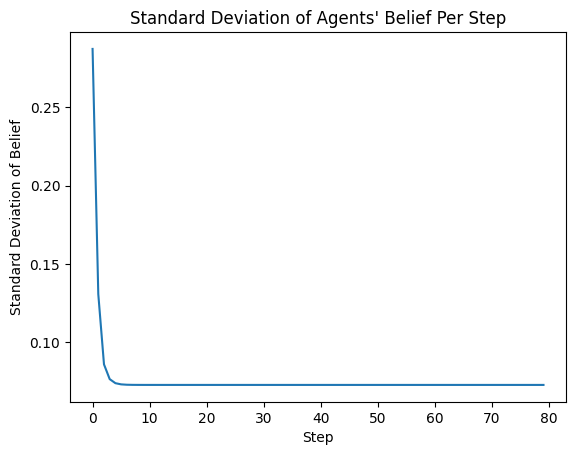

In [ ]:
# Group data by 'Step' and calculate the standard deviation for 'belief' at each step
std_dev_belief_per_step = results_df.groupby('Step')['belief'].std().reset_index()

# Rename columns for clarity
std_dev_belief_per_step.rename(columns={'belief': 'std_dev_belief'}, inplace=True)

# Now, std_dev_belief_per_step is a DataFrame with the standard deviation of belief at each step
print(std_dev_belief_per_step)

# Optionally, you can plot this as a line chart to visualize the variation over time
g = sns.lineplot(data=std_dev_belief_per_step, x="Step", y="std_dev_belief")
g.set(
    xlabel="Step",
    ylabel="Standard Deviation of Belief",
    title="Standard Deviation of Agents' Belief Per Step"
)
plt.show()


In [ ]:
# Assuming agent_data contains only one iteration. If not, filter it for a single iteration before this step.
unique_agents = agent_data['AgentID'].unique()
correlation_matrix = pd.DataFrame(index=unique_agents, columns=unique_agents)

# Calculate correlation for each pair of households
for i in unique_agents:
    for j in unique_agents:
        if i != j:
            household_i_data = agent_data[agent_data['AgentID'] == i]['belief'].reset_index(drop=True)
            household_j_data = agent_data[agent_data['AgentID'] == j]['belief'].reset_index(drop=True)
            
            # Drop NaN values if they exist
            household_i_data.dropna(inplace=True)
            household_j_data.dropna(inplace=True)
            
            # Check if both series have more than one unique value
            
            if household_i_data.nunique() > 1 and household_j_data.nunique() > 1:
                correlation = household_i_data.corr(household_j_data)
                correlation_matrix.loc[i, j] = correlation
            else:
                correlation_matrix.loc[i, j] = None
        else:
            correlation_matrix.loc[i, j] = 1.0  # The correlation of an agent with itself is always 1

# Now, correlation_matrix is a full table of correlation coefficients
print(correlation_matrix)


          0         1         2         3         4         5         6   \
0        1.0 -0.757388 -0.748081  0.624436  0.159994  0.675877  0.864335   
1  -0.757388       1.0  0.999816 -0.173352 -0.751388 -0.070365 -0.978144   
2  -0.748081  0.999816       1.0 -0.161717 -0.759558 -0.055831 -0.975046   
3   0.624436 -0.173352 -0.161717       1.0 -0.436418  0.910717  0.362174   
4   0.159994 -0.751388 -0.759558 -0.436418       1.0 -0.576016  0.609947   
5   0.675877 -0.070365 -0.055831  0.910717 -0.576016       1.0  0.273779   
6   0.864335 -0.978144 -0.975046  0.362174  0.609947  0.273779       1.0   
7  -0.879113  0.973185  0.969855 -0.379171 -0.586163 -0.297346 -0.999322   
8  -0.211934   0.77015  0.778913  0.473964 -0.967553  0.572493 -0.621413   
9   0.911665 -0.947692 -0.943603     0.459  0.507753  0.379252  0.991585   
10   0.70315 -0.992847 -0.993471  0.063776  0.810322 -0.021148  0.951782   
11    0.4986 -0.885887 -0.890358 -0.278023  0.870703 -0.299584  0.784043   
12  0.516278

In [ ]:
"""from agents import Households
# Assuming agent_data contains only one iteration. If not, filter it for a single iteration before this step.
unique_agents = agent_data['AgentID'].unique()
correlation_matrix = pd.DataFrame(index=unique_agents, columns=unique_agents)
for agent in model.schedule.agents:
    if isinstance(agent, Households):     # Check if the agent is a Households agent
        # Print the unique IDs of the agent's friends
        friend_ids = [friend.unique_id for friend in agent.friends]
# Calculate correlation for each pair of households
for friend in friend_ids:
    for i in unique_agents:
        for j in unique_agents:
            if i != j:
                household_i_data = agent_data[agent_data['AgentID'] == i]['belief'].reset_index(drop=True)
                household_j_data = agent_data[agent_data['AgentID'] == j]['belief'].reset_index(drop=True)
            
            # Drop NaN values if they exist
                household_i_data.dropna(inplace=True)
                household_j_data.dropna(inplace=True)
            
            # Check if both series have more than one unique value
                if household_i_data.nunique() > 1 and household_j_data.nunique() > 1:
                    correlation = household_i_data.corr(household_j_data)
                    correlation_matrix.loc[i, j] = correlation
                else:
                    correlation_matrix.loc[i, j] = None
            else:
                correlation_matrix.loc[i, j] = 1.0  # The correlation of an agent with itself is always 1
else: correlation_matrix.loc[i, j] = 0

# Now, correlation_matrix is a full table of correlation coefficients
print(correlation_matrix)
correlation_matrix.to_excel(r"C:\Users\stijn\Downloads\correlation matrix test.xlsx", index=True, engine = 'openpyxl')  # Set index to True if you want to include the index
"""


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 1721-1722: truncated \UXXXXXXXX escape (2780102084.py, line 1)

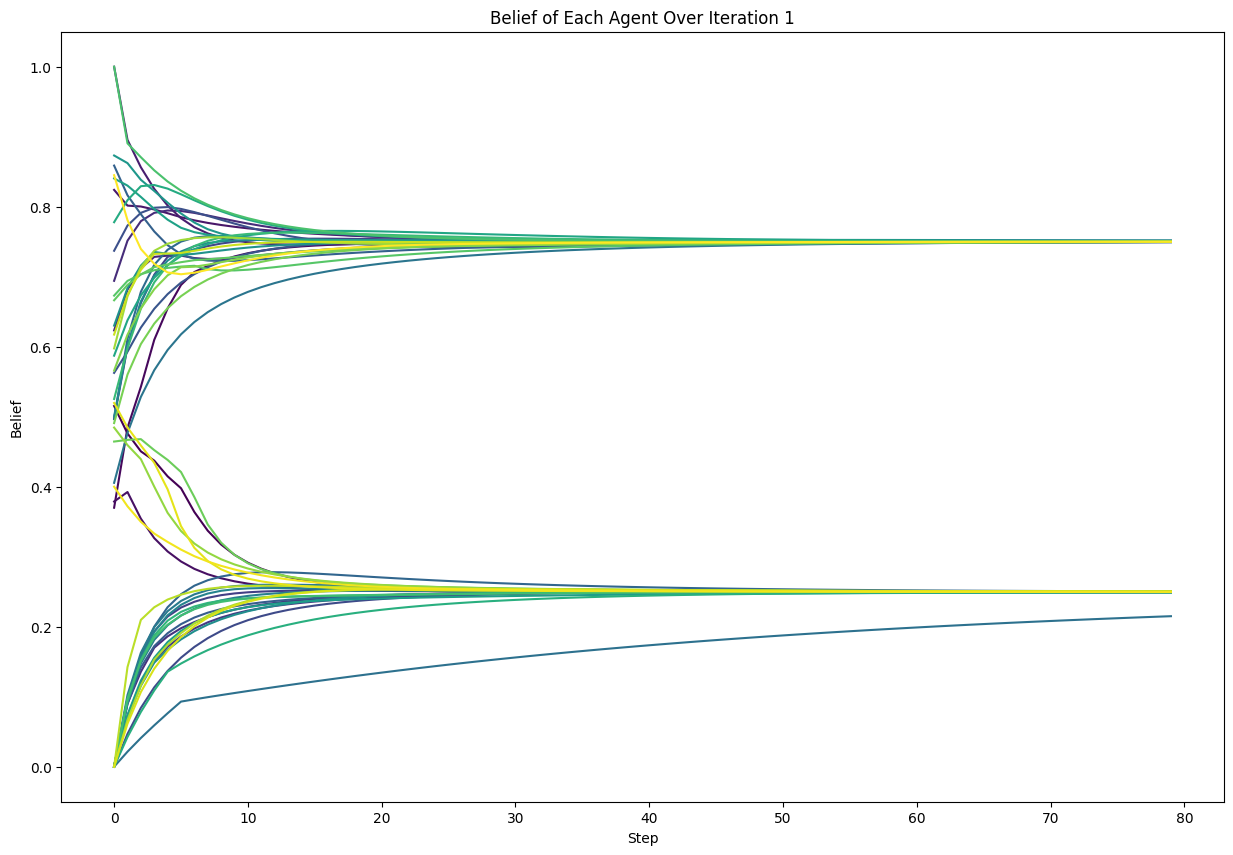

Standard deviation of belief at the first step for iteration 1: 0.3339892292245782
Standard deviation of belief at the last step for iteration 1: 0.25321189581063946


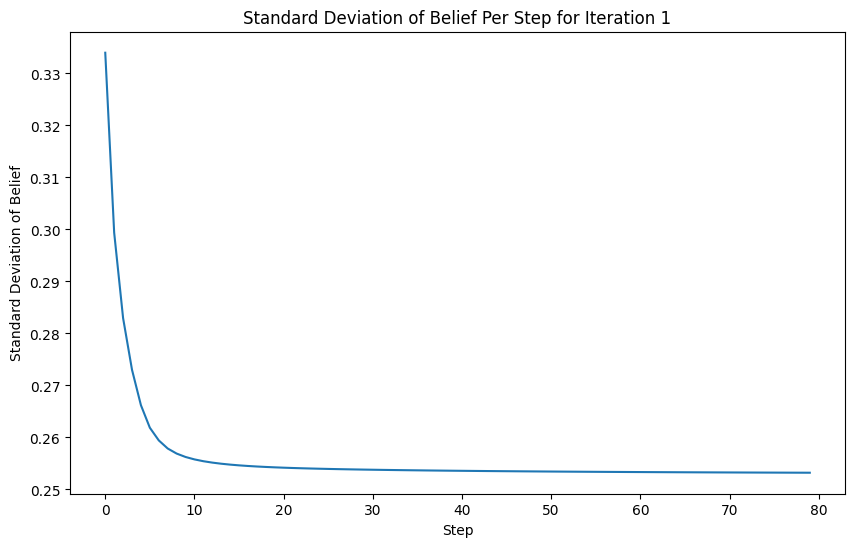

In [ ]:
# Filter for a single iteration - replace 'iteration_column' with the actual iteration column name
# and 'iteration_number' with the specific iteration you want to plot.
specific_iteration_number = 1
single_iteration_data = results_df[results_df['iteration'] == specific_iteration_number]

# Now plot the belief for each agent during this single iteration
plt.figure(figsize=(15, 10))  # Set the figure size as desired

# Use sns.lineplot to create a line for each agent
g = sns.lineplot(data=single_iteration_data, x="Step", y="belief", hue="AgentID", legend=None, palette="viridis")

g.set(
    xlabel="Step",
    ylabel="Belief",
    title=f"Belief of Each Agent Over Iteration {specific_iteration_number}"
)
plt.show()


iteration_data = results_df[results_df['iteration'] == specific_iteration_number]
# Get the data for the first and last steps of this iteration for all agents
first_step = iteration_data[iteration_data['Step'] == iteration_data['Step'].min()]
last_step = iteration_data[iteration_data['Step'] == iteration_data['Step'].max()]

# Calculate the standard deviation of beliefs at the first step
std_dev_belief_first_step = first_step['belief'].std()
print(f"Standard deviation of belief at the first step for iteration {specific_iteration_number}: {std_dev_belief_first_step}")

# Calculate the standard deviation of beliefs at the last step
std_dev_belief_last_step = last_step['belief'].std()
print(f"Standard deviation of belief at the last step for iteration {specific_iteration_number}: {std_dev_belief_last_step}")


iteration_data = results_df[results_df['iteration'] == specific_iteration_number]
# Group by 'Step' and calculate the standard deviation of beliefs at each step
std_dev_per_step = iteration_data.groupby('Step')['belief'].std().reset_index()

# Now plot the standard deviation of beliefs over each step
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
g = sns.lineplot(data=std_dev_per_step, x="Step", y="belief")
g.set(
    xlabel="Step",
    ylabel="Standard Deviation of Belief",
    title=f"Standard Deviation of Belief Per Step for Iteration {specific_iteration_number}"
)
plt.show()



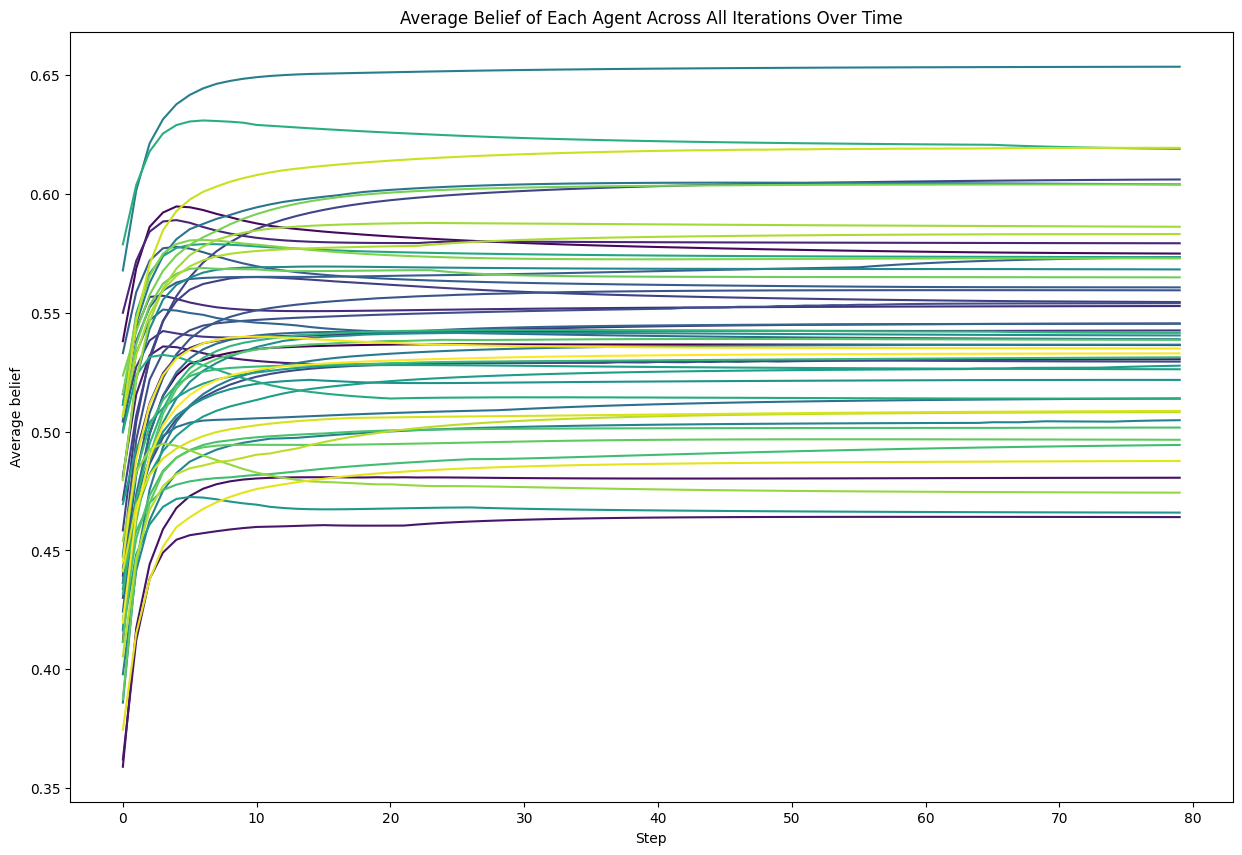

In [ ]:
# Group by 'AgentID' and 'Step', then calculate the mean belief
average_belief_per_agent_step = results_df.groupby(['AgentID', 'Step'])['belief'].mean().reset_index()

# Plot the average belief for each agent
plt.figure(figsize=(15, 10))  # Set the figure size as desired

# Use sns.lineplot and pass the 'AgentID' column to the 'hue' parameter to create a line for each agent
g = sns.lineplot(data=average_belief_per_agent_step, x="Step", y="belief", hue="AgentID", legend=None, palette="viridis")

g.set(
    xlabel="Step",
    ylabel="Average belief",
    title="Average Belief of Each Agent Across All Iterations Over Time"
)
plt.show()



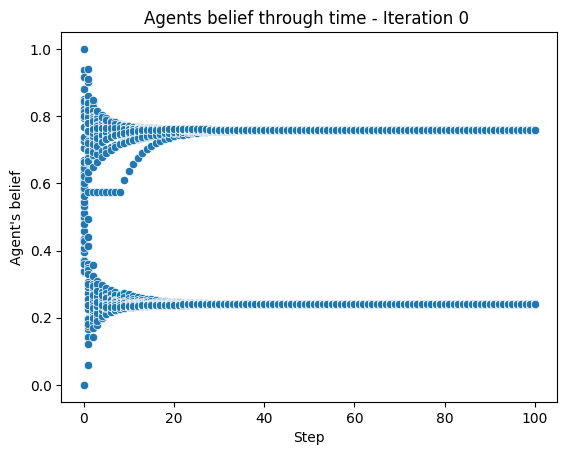

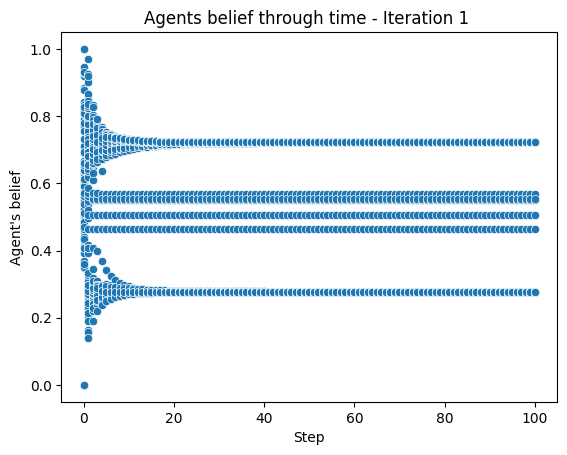

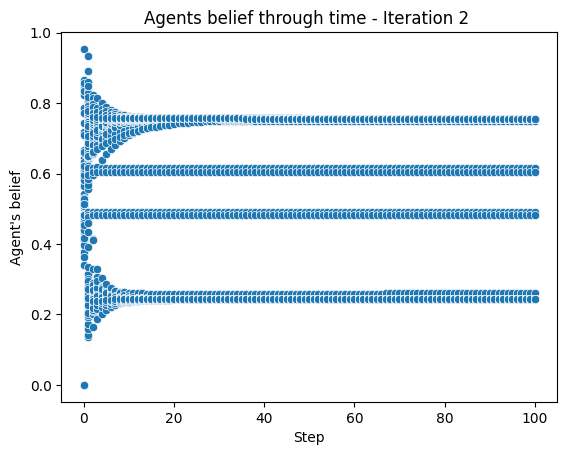

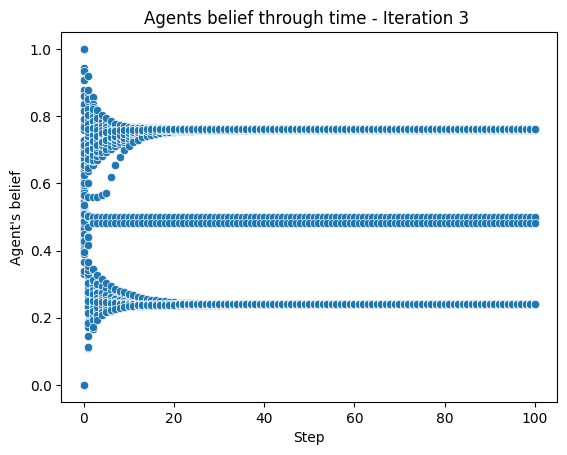

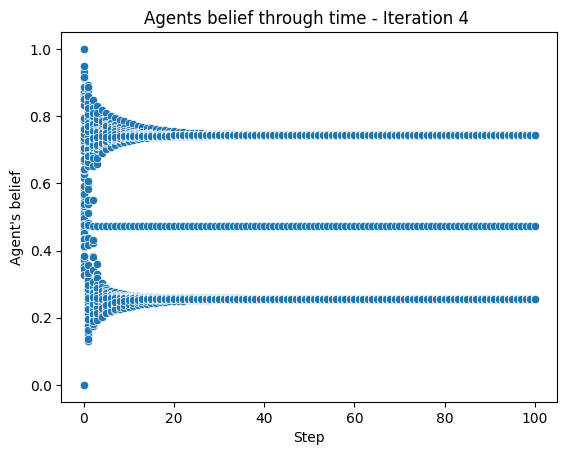

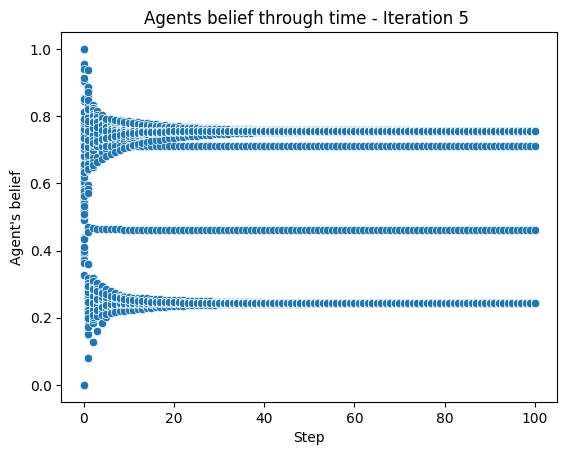

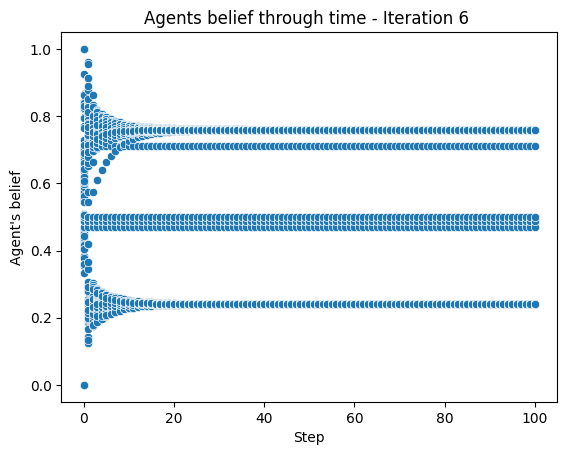

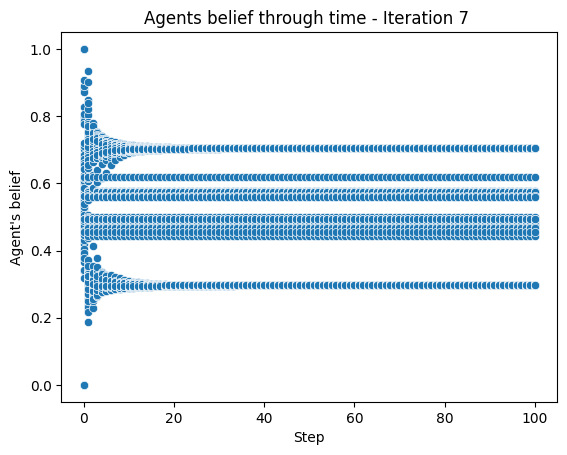

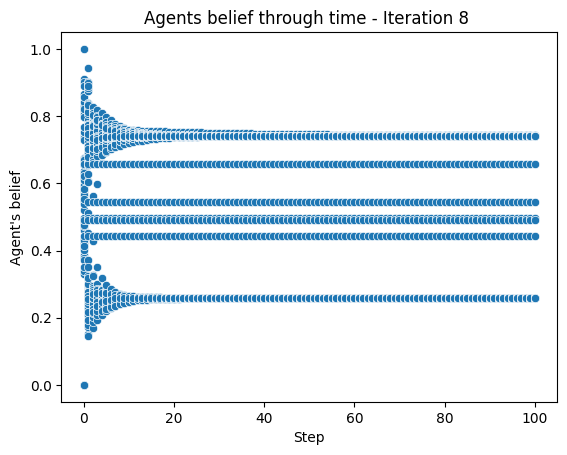

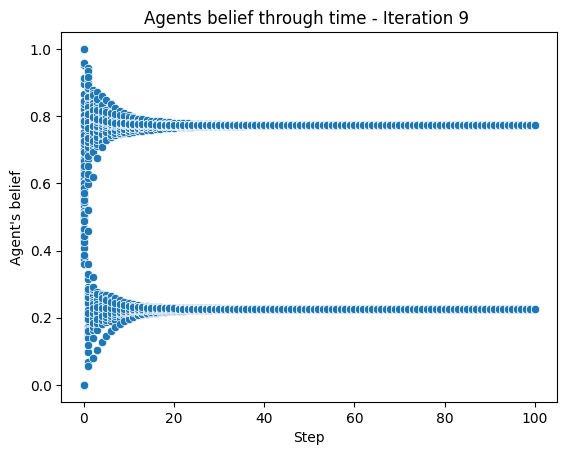

In [ ]:
unique_iterations = results_df['iteration'].unique()
for iteration in unique_iterations:
    iteration_data = results_df[results_df['iteration'] == iteration]
    g = sns.scatterplot(data=iteration_data, x="Step", y="belief")
    g.set(
        xlabel="Step",
        ylabel="Agent's belief",
        title=f"Agents belief through time - Iteration {iteration} "
    )
    plt.show()